In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import math
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score 

from sklearn.linear_model import LogisticRegression

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
from dtreeplt import dtreeplt
from sklearn.tree import DecisionTreeRegressor
from graphviz import Source
from sklearn.tree import export_graphviz

# 나이브 베이즈
from sklearn.naive_bayes import GaussianNB

# 서포트 벡터 머신
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR
from sklearn.svm import SVC
from sklearn.svm import SVR

# 앙상블
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import BaggingRegressor

# 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# 부스팅
from sklearn.ensemble import GradientBoostingRegressor

import scipy.stats as stats
from sklearn.utils.fixes import loguniform

# 성능체크
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

# 문제1

In [26]:
df = pd.read_csv('creditcard_sampled.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,124265.0,1.522319,-2.620740,0.162082,-0.413442,-2.017811,1.461869,-1.975232,0.593168,1.590390,...,0.448753,1.026305,-0.144135,0.248102,-0.329750,-0.023030,0.024540,0.003180,284.00,0
1,59241.0,-0.224159,1.180560,1.620263,2.597663,0.268749,0.371741,0.747209,-0.039479,-1.383652,...,0.116251,0.546184,-0.157833,-0.014209,-0.354865,0.228212,0.222947,-0.014396,37.33,0
2,46775.0,1.249077,-1.180277,-0.383561,-0.921614,-0.350447,0.928311,-0.825273,0.352892,-0.198168,...,-0.030222,-0.324440,-0.279178,-1.751429,0.561524,-0.125653,-0.010366,-0.007555,102.00,0
3,166573.0,2.153038,0.046845,-2.212044,0.244870,0.730598,-1.017290,0.611115,-0.412808,0.258610,...,0.065511,0.338889,-0.025033,0.540896,0.418683,0.698257,-0.121885,-0.082522,0.76,0
4,49187.0,0.723978,-1.256455,0.381422,0.074468,-0.777243,0.722340,-0.370069,0.165191,0.886716,...,-0.085468,-0.601468,-0.325365,-0.717631,0.185812,0.965630,-0.086032,0.041443,281.48,0


In [27]:
x = df.drop('Class', axis=1)
y = df['Class']

In [28]:
score_list = []
I = range(2,16)

for i in I:
    tree_cv = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    scores = cross_val_score(tree_cv, x, y, scoring='f1', cv=5)
    score_list.append(scores.mean())
    print("AUC score with max_depth {}: {:.3f}".format(i,scores.mean()))

AUC score with max_depth 2: 0.914
AUC score with max_depth 3: 0.922
AUC score with max_depth 4: 0.932
AUC score with max_depth 5: 0.939
AUC score with max_depth 6: 0.946
AUC score with max_depth 7: 0.958
AUC score with max_depth 8: 0.958
AUC score with max_depth 9: 0.962
AUC score with max_depth 10: 0.962
AUC score with max_depth 11: 0.960
AUC score with max_depth 12: 0.961
AUC score with max_depth 13: 0.959
AUC score with max_depth 14: 0.961
AUC score with max_depth 15: 0.961


In [29]:
# 가장 성과가 좋은 max_depth : 10
tree10 = DecisionTreeClassifier(criterion='entropy', max_depth=10)
tree10.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

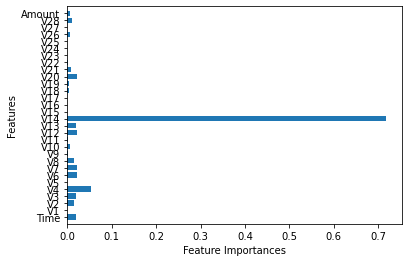

In [30]:
def plot_feature_importances(model):
    n_features = model.feature_importances_.shape[0]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), x.columns)
    plt.xlabel("Feature Importances")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)
    
plot_feature_importances(tree10)

In [31]:
# 랜덤 포레스트
x6 = df[['V14', 'V4', 'Time', 'V3', 'V6', 'V7']]
y = df['Class']

rnd_clf = RandomForestClassifier(n_estimators = 200,
                                 max_features = 3,
                                 max_samples=0.4,
                                 bootstrap = True,
                                 n_jobs=-1)
    
scores = cross_val_score(rnd_clf, x6, y, scoring='roc_auc',cv=5)
scores.mean()

0.9927950000000001

# 문제2

In [9]:
car = pd.read_csv('Carseats.csv')
car.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [10]:
# 전처리
# ShelveLoc은 서열형 변수를 2,1,0 순서대로 변환
# Urban, US는 이진형 변수를 1,0 으로 변환

ord = {'Good':2, 'Medium':1, 'Bad':0}
car['shLoc'] = car.ShelveLoc.map(ord)

car['ub'] = (car['Urban'] == 'Yes').astype(np.int)
car['inus'] = (car['US'] == 'Yes').astype(np.int)

car = car.drop(['ShelveLoc', 'Urban', 'US'], axis=1)

In [11]:
car = car.astype(int)

In [12]:
x = car.drop('Sales', axis=1)
y = car['Sales']

In [13]:
# LinearSVR
linsvr = LinearSVR() 

param_grid = {'C':[1,5,10,15,20,25,30,35,40,45,50]}
linsvr_search = GridSearchCV(linsvr,
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
linsvr_search.fit(x,y)
linsvr_search.best_estimator_ 

LinearSVR(C=25)

In [14]:
# SVR
svr = SVR(kernel="rbf") 
param_grid = {'gamma':[1,2,3,4,5,6,7,8,9,10], 'C':[1,0.5,0.1,0.01,0.05,0.001]}
svr_search = GridSearchCV(svr,
                           param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
svr_search.fit(x,y)
svr_search.best_estimator_ 

SVR(C=0.001, gamma=1)

In [15]:
# GradientBoostingRegressor
gbrt = GradientBoostingRegressor(max_depth=3, learning_rate=0.5)
x_train, x_test, y_train, y_test = train_test_split(x,y)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)

gbrt.fit(x_train,y_train)
y_pred = gbrt.predict(x_test)

errors = [math.sqrt(mean_squared_error(y_val, y_pred)) for y_pred in gbrt.staged_predict(x_val)]
bst_n_estimators = np.argmin(errors) + 1
print(bst_n_estimators)

13


In [32]:
linsvr = LinearSVR(C = 25)
svr = SVR(kernel='rbf', C = 1, gamma=0.001)
gbrt = GradientBoostingRegressor(max_depth=3, learning_rate=0.5, n_estimators=bst_n_estimators)

lin_scores = cross_val_score(linsvr, x, y, scoring='neg_mean_squared_error',cv=5)
svr_scores = cross_val_score(svr, x, y, scoring='neg_mean_squared_error',cv=5)
gbrt_scores = cross_val_score(gbrt, x, y, scoring='neg_mean_squared_error',cv=5)

print((-lin_scores.mean())**1/2)
print((-svr_scores.mean())**1/2)
print((-gbrt_scores.mean()**1/2))

1.4905421726431125
0.07395004913114538
0.022200552920592673


# 문제3

In [17]:
bc = pd.read_csv('breast-cancer.csv')
bc.head()

,code,clump,cell_size,cell_shape,adhesion,single,nuclei,chromatin,nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [18]:
bc['class'] = bc['class'].replace({2:0, 4:1})

In [19]:
x = bc.drop(['code', 'class'], axis=1)
y = bc['class']

In [20]:
# GaussianNB
gnb_bag = BaggingClassifier(GaussianNB(),
                            n_estimators=200,
                            max_features=4,
                            max_samples=100,
                            bootstrap=False)

# SVC
svc_bag = BaggingClassifier(SVC(),
                            n_estimators=200,
                            max_features=4,
                            max_samples=100,
                            bootstrap=False)

# LinearSVC
linsvc_bag = BaggingClassifier(LinearSVC(),
                               n_estimators=200,
                               max_features=4,
                               max_samples=100,
                               bootstrap=False)

# DecisionTreeClassifier
tree_bag = BaggingClassifier(DecisionTreeClassifier(),
                             n_estimators=200,
                             max_features=4,
                             max_samples=100,
                             bootstrap=False)

# LogisticRegression
log_bag = BaggingClassifier(LogisticRegression(),
                            n_estimators=200,
                            max_features=4,
                            max_samples=100,
                            bootstrap=False)

In [21]:
voting_clf = VotingClassifier(estimators = [('gnb', gnb_bag), 
                                            ('svc', svc_bag),
                                            ('linsvc', linsvc_bag),
                                            ('tree', tree_bag),
                                            ('log', log_bag)], voting='soft')


scores = cross_val_score(voting_clf, x, y, scoring='roc_auc',cv=5)
scores.mean()

0.9922095253533808

# 문제4
- 코드를 조금만 더 자세히 설명해주셨으면 좋겠습니다! 항상 감사합니다 :)